<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/translate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шаблон проекта по теме "Веб-интерфейс бота для улучшения навыков перевода на иностранный язык"

Критерии оценивания

- Выполнена функция для генерации заданий на перевод (2 балла)
- Выполнена функция для проверки упражнения на перевод (2 балла)
- Создан интерфейс с помощью библиотеки Gradio (2 балла)
- Реализована логика работы бота: бот предлагает задание на перевод, а затем производит проверку результата (2 балла)
- Бот опубликован на HuggingFace Spaces (2 балла)

### Шаг 1

Инициализируйте клиента HuggingFace API

Измените системный и пользовательский промпты так, чтобы получилась функция для генерации упражнений на отработку навыков перевода для любой языковой пары, например, для перевода с немецкого или французского на русский

Используйте образцы:

In [ ]:
# Инициализация клиента API
from huggingface_hub import InferenceClient

model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"
client = InferenceClient(model_name, token='ваш токен здесь')

In [ ]:
# Создание функции для запросов к модели
def llm_inference(user_sample):
  output = client.chat.completions.create(
          # Промпты
          messages=[
              # Основная системная инструкция
              {"role": "system", "content": "you are natural language processing guide\n"
                                            "explain the provided topic\n"
              },
              # Пользовательская инструкция
              {"role": "user",
              "content": f"explain the basics of {user_sample}"},
          ],
          stream=False,
          max_tokens=128, # Максимальная длина вывода
          temperature=0.7, # Температура
          top_p=0.1 # Объем выборки для сэмплирования
          )
  # Вывод текста, ответа модели
  return output.choices[0].get('message')['content']

### Шаг 2

Создайте новую функцию для генерации задач на проверку грамматики. Добавьте ограничение на формат ответа

Функция должна быть настроена так, чтобы модель производила JSON-объект (словарь dict) следующего вида:

```
task: "описание задачи вида "множественный выбор" по теме из пользовательского промпта"

solution: "правильный ответ"
```

Используйте сниппеты кода:

In [ ]:
# Задаем формат ответа
response_format = {
    "type": "json",
    "value": {
        "properties": {
            "task": {"type": "string"},
            "solution": {"type": "string"},
        },
        "required": ["task", "solution",]
    },
}

# Проверяем ответ модели прежде чем писать функцию
user_sample = 'Articles in English'
# Посмотрите, как мы передаем пользовательский промпт из user_sample
# с помощью f-strings форматирования строк
response = client.chat_completion(
    messages=
              # Системные и пользовательские настройки можно изменить
              {"role": "system", "content": "Generate task on the provided topic"
              },
              {"role": "user",
              "content": f"Topic: {user_sample}"},
          ],
    response_format=response_format,
    max_tokens=500,)
# Выведем результат: если результат удовлетворительный,
# начинаем писать функцию по аналогии с llm_inference из Шага 1
response.choices[0].message.content

После генерации JSON-объект нужно спарсить, т.е. превратить его в настоящий, рабочий словарь

In [ ]:
import ast
# Превращаем сгенерированный JSON (сейчас это строка, похожая на питоновский словарь)
# в настоящий питоновский словарь
result = ast.literal_eval(response.choices[0].message.content)

В этом примере мы добавили `response_format`, чтобы задать ограничение на генерацию словаря (объекта JSON)

Значение `response_format` можно адаптировать, чтобы генерировать условия задач (`task`) и их решения (`solution`)

### Шаг 3

Напишите интерфейс, через который можно запустить вашу модель с помощью библиотеки Gradio

Образец:

In [ ]:
import gradio as gr

demo = gr.ChatInterface(
    fn=respond, # Вместо respond укажите функцию для генерации упражнений
    examples=[] # Укажите в этом списке несколько примеров запросов от пользователя, например, 'Создай упражнение для перевода с русского на немецкий'
    title='', # Укажите здесь название вашего бота
    description='', # Добавьте сюда описание бота
)

demo.launch()

Запустите ячейку и протестируйте работу вашего бота

### Шаг 4

Мы реализовали только одну из функций бота. Попробуем их объединить: создайте промпт, в котором вы описываете логику работы модели, например

```
Если пользователь попросил создать задание на перевод, предложи упражнение на перевод.

Как только пользователь отправил тебе свое решение, произведи проверку качества перевода, представь анализ и оценку.
```

Создайте еще одну функцию и "оберните" новую функцию в интерфейс gradio

### Шаг 5

Опубликуйте результат на HuggingFace

1. Создайте новый space по ссылке https://huggingface.co/new-space
2. Оформите репозиторий

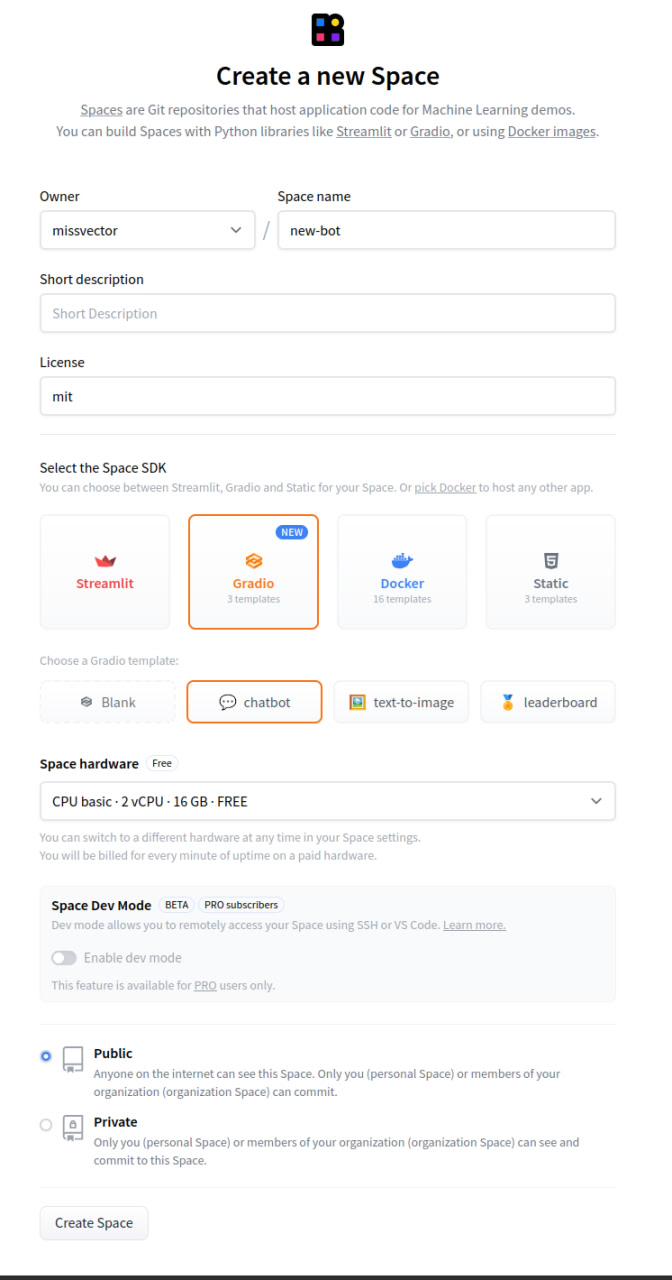

3. Как только бот загрузился, перейдите во вкладку `Files`

4. Найдите файл `app.py` и выберите `Edit`

5. Оформить свой файл по образцу: https://huggingface.co/spaces/missvector/bot/blob/main/app.py

  - замените функцию `respond` на свою функцию
  - замените `demo` на результат своей работы в Gradio
  - удалите строки (в вашем проекте они не нужны)

  ```
  from datasets import load_dataset
  import pandas as pd

  ds = pd.DataFrame(load_dataset("missvector/okkolo-kb")['train']).to_string()
  ```

Представьте ссылку на результат вашей работы